<table>
    <tr>
        <td><img src="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Logo_EICT_horizontal_ESPANOL%20(1).png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Entregable 3   </p> PLN+ML</FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Aprendizaje Automático de Máquina </p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría MACC 2025-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

# <FONT SIZE=3 COLOR="purple"> 1. OBJETIVOS DE APRENDIZAJE </FONT>

Este taller corresponde a la parte PLN + ML y se espera que el estudiante demuestre los siguientes resultados de aprendizaje:

- Hacer Web Scraping con la librería Selenium Y BeautifulSoup y aplicar modelos de ML

# <FONT SIZE=3 COLOR="purple"> 2. INDICACIONES </FONT>

- Se debe cargar el caso parte 2 en la plataforma (*e-aulas*) **en formato .ipynb y también como .pdf**

- Plazo de entrega **sábado 22 de noviembre 6:00 p.m.**

- Envío de notas finales: retroalimentación y entrega de notas finales miércoles 26 de noviembre.

# <FONT SIZE=3 COLOR="red"> 3. PUNTOS A DESARROLLAR </FONT>

# <FONT SIZE=5 COLOR="purple"> Punto 1. Word2Vec </FONT>

Seleccionar el conjunto denominado *Software*, que es uno de conjuntos de *reviews* de Amazon.

https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

1. Cargar los datos y explorar

   - ¿Cuál es el tamaño de los datos?
   - Hacer la tabla de frecuencia de la variable *overall*.
   - ¿Cuántos comentarios (usuarios) verificados tiene el conjunto?
   - ¿Qué es *unixReviewTime*? Explique

2. Limpiar la variable *reviewText*. Normalizar.

3. Tokenizar y aplicar *Word2Vec*.

4. Guardar el modelo.

5. Mostrar algunos ejemplos de la similitud de palabras con base al contexto de los datos. Interprete.

6. Seleccionar una muestra de 10.000 registros normalizados (limpios). Hacer la tabla de frecuencia del top 10 de palabras. Hacer una nube de palabras con máscara e interpretar.

7. Enuncie algunas conclusiones de este punto

In [ ]:
# Manipulación de data.frames
import pandas as pd
import numpy as np
import time

# Librerías para Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as xlabel

# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento
from sklearn.preprocessing      import StandardScaler, MinMaxScaler
from sklearn.preprocessing      import LabelEncoder, OneHotEncoder
from sklearn.compose            import ColumnTransformer
from sklearn.pipeline           import Pipeline

# Para modelos de clasificación y regresión clásicos machine learning

from sklearn.linear_model       import LinearRegression
from sklearn.naive_bayes        import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors          import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model       import LogisticRegression
from sklearn.tree               import DecisionTreeClassifier,  DecisionTreeRegressor

# modelos de ensamble
from sklearn.ensemble          import BaggingClassifier, BaggingRegressor
from sklearn.ensemble          import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble          import ExtraTreesClassifier, ExtraTreesRegressor

from sklearn.ensemble          import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble          import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost                   import XGBClassifier, XGBRegressor
from lightgbm                  import LGBMClassifier, LGBMRegressor
from catboost                  import CatBoostClassifier, CatBoostRegressor

# Métricas de evaluación
from sklearn.metrics            import roc_auc_score
from sklearn.metrics            import roc_curve, auc
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics           import specificity_score
from sklearn.metrics            import mean_squared_error, mean_absolute_error, r2_score

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV
# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

#para guardar
import joblib
from joblib                     import dump, load



In [7]:
amazon = pd.read_json("Software.json.gz", lines=True)
print("Listo, datos cargados")

Listo, datos cargados


In [8]:
print(amazon.head(5))

   overall  verified   reviewTime      reviewerID        asin  \
0        4      True  03 11, 2014  A240ORQ2LF9LUI  0077613252   
1        4      True  02 23, 2014  A1YCCU0YRLS0FE  0077613252   
2        1      True  02 17, 2014  A1BJHRQDYVAY2J  0077613252   
3        3      True  02 17, 2014   APRDVZ6QBIQXT  0077613252   
4        5     False  10 14, 2013  A2JZTTBSLS1QXV  0077775473   

                        style         reviewerName  \
0  {'Format:': ' Loose Leaf'}           Michelle W   
1  {'Format:': ' Loose Leaf'}  Rosalind White Ames   
2  {'Format:': ' Loose Leaf'}       Allan R. Baker   
3  {'Format:': ' Loose Leaf'}                 Lucy   
4                         NaN            Albert V.   

                                          reviewText  \
0  The materials arrived early and were in excell...   
1  I am really enjoying this book with the worksh...   
2  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3  This book was missing pages!!! Important pages...   
4  I

 - ¿Cuál es el tamaño de los datos?

In [9]:
amazon.shape

(459436, 12)

El conjunto de datos tiene 12 columnas y 459.436 filas

- Hacer la tabla de frecuencia de la variable **overall**.

In [10]:

frecuencia = amazon['overall'].value_counts(normalize=True) * 100
tabla_frecuencia = frecuencia.reset_index()
tabla_frecuencia.columns = ['Valor', 'Porcentaje']

print(tabla_frecuencia)


   Valor  Porcentaje
0      5   46.241914
1      1   22.320410
2      4   16.018771
3      3    8.574644
4      2    6.844261


- ¿Cuántos comentarios (usuarios) verificados tiene el conjunto?

In [11]:
frecuencia = amazon['verified'].value_counts()
# Si quieres convertirlo en un DataFrame ordenado:
tabla_frecuencia = frecuencia.reset_index()
tabla_frecuencia.columns = ['Valor', 'Frecuencia']

print(tabla_frecuencia)


   Valor  Frecuencia
0   True      309345
1  False      150091


Se tienen más de 300.000 comentarios verificados, especificamente **309.345**

- ¿Qué es *unixReviewTime*? Explique

0   2014-03-11
1   2014-02-23
2   2014-02-17
3   2014-02-17
4   2013-10-14
5   2011-08-15
6   2010-10-09
7   2010-10-03
Name: fecha, dtype: datetime64[ns]


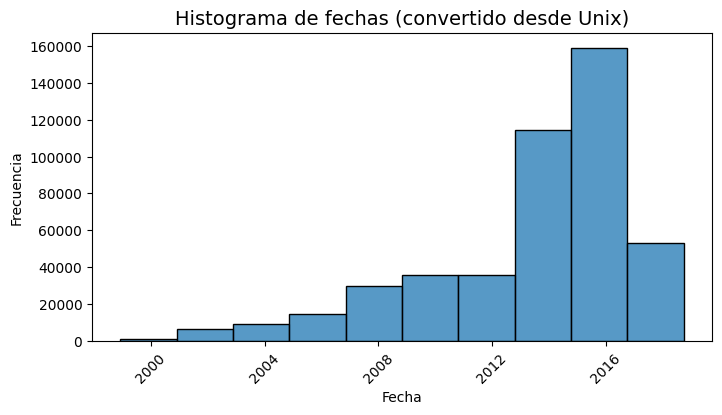

In [12]:
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir Unix a fecha
amazon['fecha'] = pd.to_datetime(amazon['unixReviewTime'], unit='s')

print(amazon.fecha.head(8))

# Histograma con fechas
plt.figure(figsize=(8, 4))
sns.histplot(amazon['fecha'], bins=10, kde=False)
plt.title('Histograma de fechas (convertido desde Unix)', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()



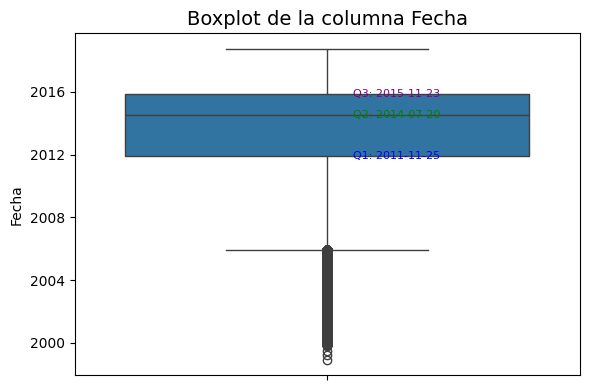

In [13]:
# Calcular cuartiles
q1 = amazon['fecha'].quantile(0.25)
q2 = amazon['fecha'].quantile(0.50)  # mediana
q3 = amazon['fecha'].quantile(0.75)

# Crear boxplot
plt.figure(figsize=(6, 4))
ax = sns.boxplot(y=amazon['fecha'])
plt.title('Boxplot de la columna Fecha', fontsize=14)
plt.ylabel('Fecha')

# Añadir etiquetas para cuartiles
ax.text(0.05, q1, f'Q1: {q1.strftime("%Y-%m-%d")}', ha='left', va='center', fontsize=8, color='blue')
ax.text(0.05, q2, f'Q2: {q2.strftime("%Y-%m-%d")}', ha='left', va='center', fontsize=8, color='green')
ax.text(0.05, q3, f'Q3: {q3.strftime("%Y-%m-%d")}', ha='left', va='center', fontsize=8, color='purple')

plt.tight_layout()
plt.show()

La columna corresponde a las fechas de los comentarios, donde se puede ver que la gran mayoria están entre 2011 y 2015


2. Limpiar la variable *reviewText*. Normalizar.

In [14]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459436 entries, 0 to 459435
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   overall         459436 non-null  int64         
 1   verified        459436 non-null  bool          
 2   reviewTime      459436 non-null  object        
 3   reviewerID      459436 non-null  object        
 4   asin            459436 non-null  object        
 5   style           234401 non-null  object        
 6   reviewerName    459412 non-null  object        
 7   reviewText      459370 non-null  object        
 8   summary         459380 non-null  object        
 9   unixReviewTime  459436 non-null  int64         
 10  vote            127853 non-null  object        
 11  image           1508 non-null    object        
 12  fecha           459436 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(2), object(9)
memory usage: 42.5+ MB


In [15]:
# Vamos a eliminar los datos faltantes de la variable de interés.
review = amazon.reviewText.dropna()
review.head

<bound method NDFrame.head of 0         The materials arrived early and were in excell...
1         I am really enjoying this book with the worksh...
2         IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...
3         This book was missing pages!!! Important pages...
4         I have used LearnSmart and can officially say ...
                                ...                        
459431    No instructions.....No Help unless you want to...
459432                                          it's a joke
459433    I have multiple licenses of the Antivirus. I h...
459434                                           good value
459435                       very nice designs easy to use.
Name: reviewText, Length: 459370, dtype: object>

In [16]:
# Convertir los review en una cadena e imprimimos la longitud
amazon_corpus = ''.join(amazon['reviewText'].dropna()+" ")
print("El corpus contiene {0:,} caracteres".format(len(amazon_corpus)))

El corpus contiene 197,990,167 caracteres


In [17]:
import re
#!pip install stop-words
from stop_words import get_stop_words
stop_words=get_stop_words("en")
# Limpiar y dividie las sentencias en palabras.
def clean_and_split_str(texto):
    # minúscula
    texto = texto.lower()
    # eliminar caracteres especiales
    texto = re.sub("(@[a-z]+|#[a-z]+)+", " ", texto)
    texto = re.sub("[^a-z]+", " ", texto)
    # eliminar las stop_words
    texto = [palabra for palabra in texto.split() if (len(palabra)>3 and palabra not in stop_words) | (palabra == "not")]
    # cadena texto
    return texto

# aplicamos la función de limpieza generando una lista limpia y tokenizada
sentences=[clean_and_split_str(oracion) for oracion in review]

In [18]:
sentences[:5]


[['materials',
  'arrived',
  'excellent',
  'condition',
  'money',
  'spent',
  'binder',
  'not',
  'loose',
  'leaf'],
 ['enjoying',
  'book',
  'worksheets',
  'review',
  'goals',
  'not',
  'reminds',
  'human',
  'sexuality',
  'classwork'],
 ['class',
  'waste',
  'money',
  'called',
  'book',
  'book',
  'isin',
  'bound',
  'loose',
  'leafs',
  'provide',
  'binder',
  'access',
  'book',
  'mcgraw',
  'hill',
  'connect',
  'core',
  'book',
  'complete',
  'waste',
  'money'],
 ['book', 'missing', 'answer', 'questions', 'happen'],
 ['learnsmart',
  'officially',
  'amazing',
  'study',
  'tool',
  'simply',
  'adapts',
  'style',
  'learning',
  'access',
  'anytime',
  'start',
  'learnsmart',
  'realize',
  'learn',
  'study',
  'business',
  'student',
  'not',
  'learnsmart',
  'accounting',
  'class',
  'accounting',
  'class',
  'grade',
  'difference',
  'accounting',
  'accounting',
  'letter',
  'grade',
  'learnsmart',
  'college',
  'student',
  'check']]

3. Tokenizar y aplicar *Word2Vec*.

In [19]:
# Importar y generar el modelo
#!pip install gensim
from gensim.models import Word2Vec
word2vec = Word2Vec(sentences, min_count=1)

4. Guardar el modelo.

In [20]:
# para guardar el modelo
word2vec.save("amazonSoftware.model.w2v")

5. Mostrar algunos ejemplos de la similitud de palabras con base al contexto de los datos. Interprete.

In [21]:
#!pip install scikit-learn

u = word2vec.wv["book"]
v= word2vec.wv["money"]

from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
cosine_similarity(u.reshape(1, -1), v.reshape(1, -1))



array([[0.03633879]], dtype=float32)

In [22]:
sim_words = word2vec.wv.most_similar("shoes")
sim_words

[('pizza', 0.7969428300857544),
 ('pants', 0.7777635455131531),
 ('helicopters', 0.771773099899292),
 ('battleship', 0.7703067660331726),
 ('sand', 0.7700260877609253),
 ('twist', 0.7678788900375366),
 ('babyz', 0.7653254270553589),
 ('wagon', 0.7549404501914978),
 ('breeds', 0.7528013586997986),
 ('ladder', 0.7527182698249817)]

In [23]:
sim_words = word2vec.wv.most_similar("money")
sim_words

[('bucks', 0.6964274048805237),
 ('moneyupgrading', 0.6544331312179565),
 ('penny', 0.625581681728363),
 ('monies', 0.6247634291648865),
 ('dollars', 0.611560583114624),
 ('fortune', 0.6017755270004272),
 ('thisturbotax', 0.5907902121543884),
 ('time', 0.5837665796279907),
 ('cash', 0.5763218402862549),
 ('cent', 0.5732754468917847)]

In [24]:
sim_words = word2vec.wv.most_similar("human")
sim_words

[('robot', 0.742047131061554),
 ('agents', 0.6278972625732422),
 ('indian', 0.6203275322914124),
 ('accents', 0.6203244924545288),
 ('condescending', 0.6154873967170715),
 ('scripted', 0.6072319746017456),
 ('talk', 0.6065472960472107),
 ('shore', 0.6014679074287415),
 ('humans', 0.6011136174201965),
 ('slur', 0.5964177846908569)]

In [25]:
sim_words = word2vec.wv.most_similar("software")
sim_words

[('program', 0.7190431356430054),
 ('product', 0.6920257806777954),
 ('package', 0.5793944001197815),
 ('products', 0.5774946212768555),
 ('packages', 0.5770127773284912),
 ('programs', 0.5681453943252563),
 ('application', 0.5582065582275391),
 ('assuming', 0.49672678112983704),
 ('not', 0.4897163510322571),
 ('softwares', 0.48217812180519104)]

In [26]:
sim_words = word2vec.wv.most_similar("condition")
sim_words

[('arrived', 0.738255500793457),
 ('undamaged', 0.7252824902534485),
 ('shipment', 0.6999796628952026),
 ('shipped', 0.6956716179847717),
 ('shipper', 0.6904675960540771),
 ('packaged', 0.6832876801490784),
 ('delivered', 0.6830282211303711),
 ('sealed', 0.6720411777496338),
 ('pristine', 0.6667137742042542),
 ('ontime', 0.6600090861320496)]

6. Seleccionar una muestra de 10.000 registros normalizados (limpios). Hacer la tabla de frecuencia del top 10 de palabras. Hacer una nube de palabras con máscara e interpretar.

In [27]:
from collections import Counter
# Aplanar la lista
all_words = [word for sentence in sentences for word in sentence]

# Tomar solo 10.000 palabras
sample_words = all_words[:10000] 

# Contar frecuencia
counter = Counter(sample_words)

# Top 10
top_10 = counter.most_common(10)
print(top_10)

[('japanese', 208), ('video', 196), ('not', 175), ('learn', 167), ('learning', 109), ('program', 102), ('book', 98), ('software', 98), ('lightroom', 92), ('dreamweaver', 73)]


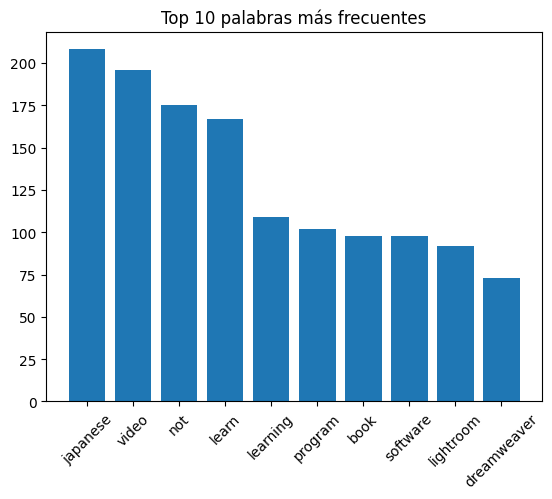

In [28]:
import matplotlib.pyplot as plt

palabras, frecuencias = zip(*top_10)
plt.bar(palabras, frecuencias)
plt.title('Top 10 palabras más frecuentes')
plt.xticks(rotation=45)
plt.show()


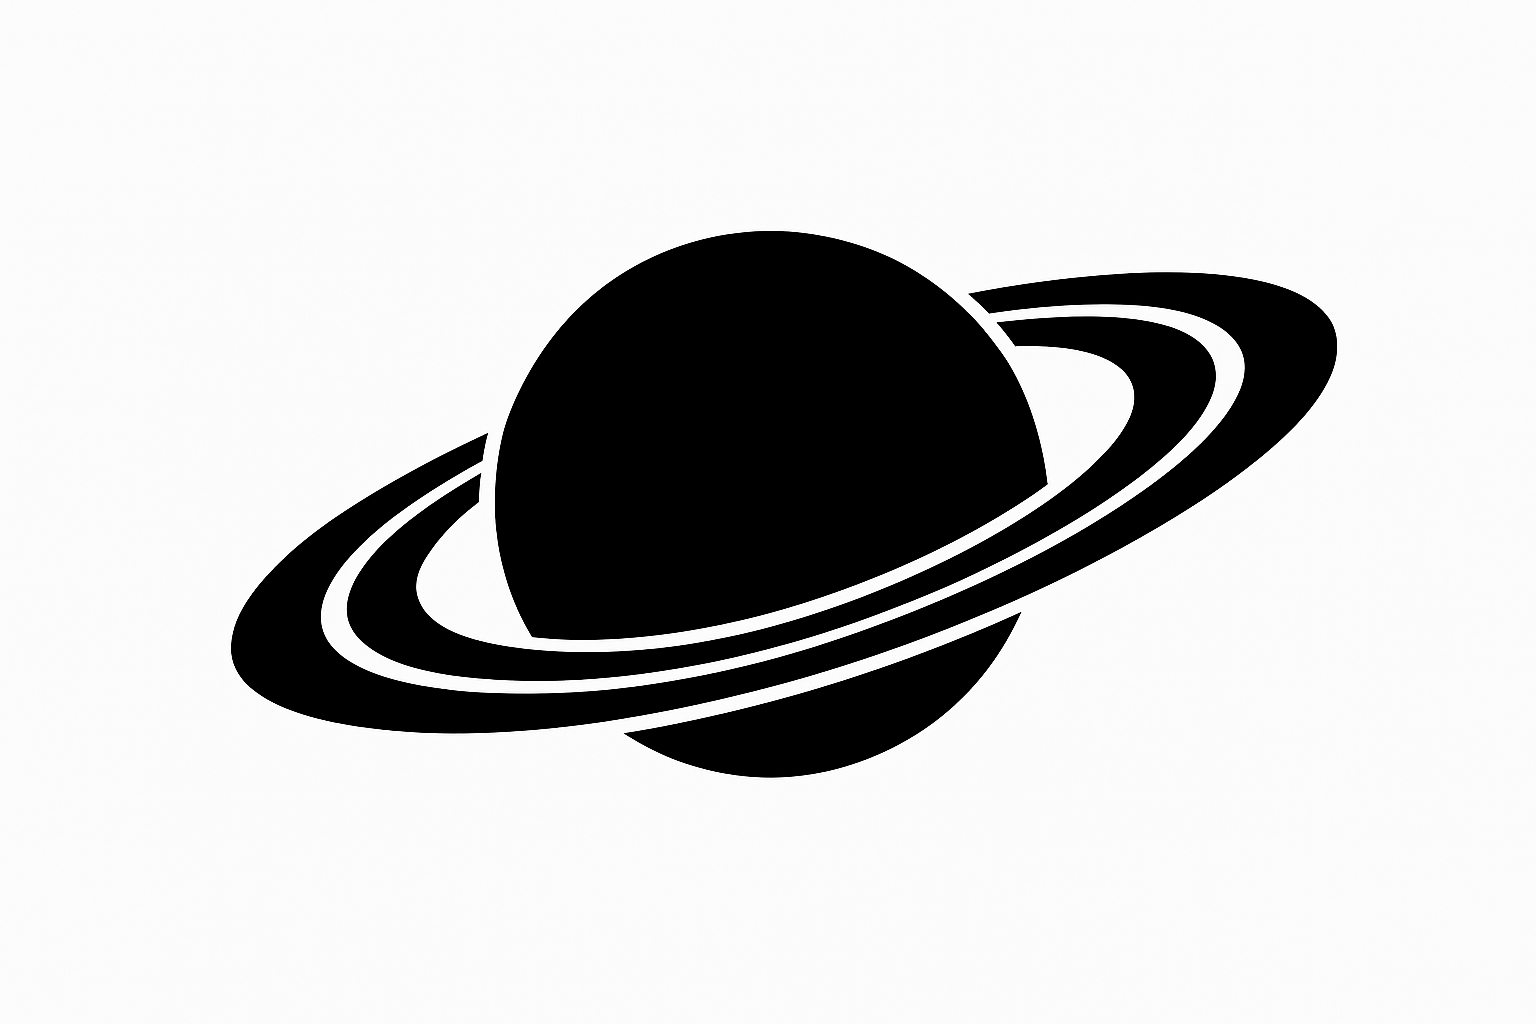

In [29]:
import PIL.Image
from IPython.display import display

saturno = PIL.Image.open("saturno.png")
display(saturno)

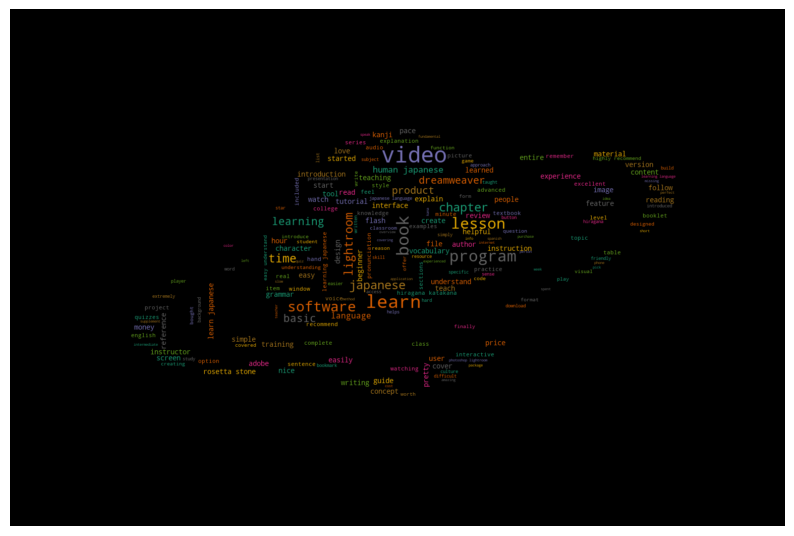

In [30]:
# Para las nubes de palabras
#!pip install wordcloud
from wordcloud      import WordCloud, ImageColorGenerator

Saturno_mask = np.array(saturno.convert("L"))
mask_saturno = np.where(Saturno_mask > 0, 255, 0).astype(np.uint8)

wordcloud = WordCloud(width=1536, height=1024,
                      max_font_size=100,
                      max_words=200,
                      background_color='black',
                      colormap='Dark2_r',  # https://www.kaggle.com/code/niteshhalai/wordcloud-colormap
                      stopwords=None,
                      mask=mask_saturno,
                      contour_width=0,
                      contour_color='green').generate(" ".join(sample_words))

wordcloud.to_file("cruz_wordcloud.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Dentro el top diez de palabras dentro de la muestra, se puede ver palabras muy comunes de temas relacionados con programas o software como lo son learn, book, read, styles, class, se puede ver la relación clara de comentarios hablando de experiencias o características al momento de usar un software o hablar de desarrollos, adicional se puede ver palabras más comunes para referenciar algún contenido digital como lo son video, créate o marketing. Y por último una palabra que directamente es un software como lo es Dreamweaver, el cual es un software de adobe para desarrollar paginas web. Se puede ver en todo el conjunto de palabras como están relacionados con programación o con un entorno digital. 

7. Enuncie algunas conclusiones de este punto

## <FONT SIZE=5 COLOR="purple"> **Conclusiones** </FONT>

1. La familia de modelos Word2Vec es muy eficiente para el procesamiento de lenguaje natural, esto se puede observar cuando se validan las similitudes entre palabras, la validación se encuentra un sentido lógico entre las diferentes palabras, y el valor indicado que muestra. Por ejemplo, se puede ver entre las palabras book y money donde muestra una relación negativa y muy baja, lo cual tiene sentido debido a la baja relación entre dichas palabras. 

2. Realizar las nubes de palabras suele ser una manera muy efectiva de entender el contexto de los datos, en este caso, aunque se tomó solo una muestra pequeña, se evidencia de manera sencilla que todas las palabras tienen una relación con un entorno digital, muy relacionados a términos usados en programación o con productos digitales.  Por lo cual es una excelente herramienta para el análisis de lenguaje natural en grandes volúmenes de datos. 


# <FONT SIZE=5 COLOR="purple"> Punto 2. WebScraping </FONT>

El propósito de este ejercicio es hacer Web Scraping de la siguiente página

https://es.trustpilot.com/review/amazon.es

donde encontrará comentarios en diferentes idiomas de productos de **amazon**

Particularmente nos centraremos en extraer:

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/c4d1e4d979ef2101ed5ee7a82c9203fcdf1809a0/selenium/selenium8.png?raw=true" alt="centered image" width="650" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

1. Genere código en Python usando Selenium que automatice la extracción de:

   - La **calificación**: número de estrellas 1 a 5.

   - El **texto del comentario** (sin el título)

   - La **fecha de experiencia**.

**Nota**: deben extraer los comentarios de las primeras 50 páginas. ¿cuánto tiempo tarda la operación?

2. Construir un data.frame con tres columnas denominadas: comentario, calificación y fecha. En la primera columna debe estar el texto, en la segunda el valor de 1 a 5 (estrellas) y en la última columna la fecha de experiencia.

3. Adicione una columna con la limpieza del texto.

4. Haga una tabla de frecuencia con la variable *calificación*.

5. Haga una nube de palabras con máscara (imagen) donde represente las palabras que más se repiten del texto limpio.

6. Enuncie algunas conclusiones de este punto

# <FONT SIZE=5 COLOR="purple"> Punto 3. PLN+ML  </FONT>

Considere el conjunto de datos *winemag-data_first150k.csv* de la siguiente página web:

https://www.kaggle.com/datasets/zynicide/wine-reviews?resource=download.

En este dataset se encuentran alrededor de 150.000 reseñas de vinos en inglés, con sus respectivos precios,variedades y países de origen.

El objetivo del ejercicio será clasificar diferentes descripciones de vino según su país de origen.

1. Cargue los datos y haga una breve descripción de estos.

2. Haga una tabla de frecuencia de la variable *country*. ¿Cuáles son los 5 países con más registros?

3. Seleccione una muestra aleatoria de 10.000 vinos de los 5 primeros países con más reseñas.

4. Realice el proceso de limpieza de las descripciones

5. Haga una nube de palabras con máscara para entender los datos

6. Aplique 3 modelos de machine learning (incluyendo Naive-Bayes) y 2 vectorizadores: *CountVectorizer* y *TfidfVectorizer* para resolver el problema de clasificación

7. Evalúe los modelos y realice una tabla comparativa entre los tres modelos y las dos formas de vectorizar.

8. Reporte algunas conclusiones.




1. Cargue los datos y haga una breve descripción de estos.

In [31]:
import pandas as pd
import numpy  as np

In [32]:
vinos = pd.read_csv("winemag-data-130k-v2.csv")
print("Listo, datos cargados")

Listo, datos cargados


In [33]:
vinos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


2. Haga una tabla de frecuencia de la variable *country*. ¿Cuáles son los 5 países con más registros?

In [34]:
frecuenciap3 = vinos['country'].value_counts()
porcentaje = vinos['country'].value_counts(normalize=True) * 100

tabla_frecuenciap3 = pd.DataFrame({
    'Valor': frecuenciap3.index,
    'Frecuencia': frecuenciap3.values,
    'Porcentaje': porcentaje.values
})

print(tabla_frecuenciap3)


                     Valor  Frecuencia  Porcentaje
0                       US       54504   41.955846
1                   France       22093   17.006651
2                    Italy       19540   15.041414
3                    Spain        6645    5.115158
4                 Portugal        5691    4.380793
5                    Chile        4472    3.442436
6                Argentina        3800    2.925147
7                  Austria        3345    2.574899
8                Australia        2329    1.792807
9                  Germany        2165    1.666564
10             New Zealand        1419    1.092311
11            South Africa        1401    1.078456
12                  Israel         505    0.388737
13                  Greece         466    0.358715
14                  Canada         257    0.197832
15                 Hungary         146    0.112387
16                Bulgaria         141    0.108538
17                 Romania         120    0.092373
18                 Uruguay     

Los países que más se repiten son 
-	Estados unidos 
-	Francia
-	Italia 
-	España
-	Portugal 
Donde entre los 5 llegan representar más del 80% de los datos


3. Seleccione una muestra aleatoria de 10.000 vinos de los 5 primeros países con más reseñas.

In [35]:
top5 = ['US', 'France', 'Italy', 'Spain', 'Portugal']

# Filtrar solo los registros que pertenecen al top 5
df_top5 = vinos[vinos['country'].isin(top5)]

# Tomar una muestra aleatoria de 10,000 registros
muestra_10000 = df_top5.sample(n=10000, random_state=777)

muestra_10000.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
29165,29165,US,"Palisade remains principally Merlot, with a li...",Palisade,92,25.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Soos Creek 2009 Palisade Merlot-Cabernet (Colu...,Merlot-Cabernet,Soos Creek
91597,91597,Portugal,"As proof that any blend goes in Tejo, this win...",Terra de Touros,83,9.0,Tejo,NaN,NaN,Roger Voss,@vossroger,Quinta do Casal Monteiro 2013 Terra de Touros ...,Portuguese Red,Quinta do Casal Monteiro
88616,88616,US,This wine is near-equal parts Marsanne and Pic...,Los Odios,89,28.0,Washington,Walla Walla Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ardor 2014 Los Odios White (Walla Walla Valley...,White Blend,Ardor
114254,114254,France,"Smoky and structured, this is a dry wine with ...",Clos du Roy,88,NaN,Burgundy,Marsannay,NaN,Roger Voss,@vossroger,Domaine René Bouvier 2014 Clos du Roy (Marsan...,Pinot Noir,Domaine René Bouvier
7512,7512,Italy,This elegant sparkler opens with alluring arom...,Dosaggio Zero,92,30.0,Veneto,Valdobbiadene Prosecco Superiore,NaN,Kerin O’Keefe,@kerinokeefe,Ca' dei Zago 2013 Dosaggio Zero (Valdobbiaden...,Glera,Ca' dei Zago


In [36]:
muestra_10000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 29165 to 3491
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   country                10000 non-null  object 
 2   description            10000 non-null  object 
 3   designation            6969 non-null   object 
 4   points                 10000 non-null  int64  
 5   price                  9267 non-null   float64
 6   province               10000 non-null  object 
 7   region_1               9413 non-null   object 
 8   region_2               4613 non-null   object 
 9   taster_name            7685 non-null   object 
 10  taster_twitter_handle  7412 non-null   object 
 11  title                  10000 non-null  object 
 12  variety                10000 non-null  object 
 13  winery                 10000 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ M

4. Realice el proceso de limpieza de las descripciones

In [37]:
reviewp3 = muestra_10000.description
reviewp3.head()

29165     Palisade remains principally Merlot, with a li...
91597     As proof that any blend goes in Tejo, this win...
88616     This wine is near-equal parts Marsanne and Pic...
114254    Smoky and structured, this is a dry wine with ...
7512      This elegant sparkler opens with alluring arom...
Name: description, dtype: object

In [38]:
# Convertir los review en una cadena e imprimimos la longitud
vinos_corpus = ''.join(muestra_10000['description'].dropna()+" ")
print("El corpus contiene {0:,} caracteres".format(len(vinos_corpus)))

El corpus contiene 2,405,644 caracteres


In [39]:
import re
#!pip install stop-words
from stop_words import get_stop_words
stop_words=get_stop_words("en")
# Limpiar y dividie las sentencias en palabras.
def clean_and_split_str(texto):
    # minúscula
    texto = texto.lower()
    # eliminar caracteres especiales
    texto = re.sub("(@[a-z]+|#[a-z]+)+", " ", texto)
    texto = re.sub("[^a-z]+", " ", texto)
    # eliminar las stop_words
    texto = [palabra for palabra in texto.split() if (len(palabra)>3 and palabra not in stop_words) | (palabra == "not")]
    # cadena texto
    return texto

# aplicamos la función de limpieza generando una lista limpia y tokenizada
sentencesp3=[clean_and_split_str(oracion) for oracion in reviewp3]

In [40]:
sentencesp3[:5]

[['palisade',
  'remains',
  'principally',
  'merlot',
  'cabernet',
  'sauvignon',
  'blend',
  'smoky',
  'focused',
  'riot',
  'loganberry',
  'blueberry',
  'blue',
  'purple',
  'fruits',
  'tangy',
  'mouthfeel',
  'brings',
  'streaks',
  'coffee',
  'mineral',
  'tart',
  'elegant',
  'finish'],
 ['proof',
  'blend',
  'tejo',
  'wine',
  'touriga',
  'nacional',
  'pinot',
  'noir',
  'initially',
  'acidity',
  'fruit',
  'soft',
  'texture',
  'fruit',
  'slowly',
  'fresh',
  'plum',
  'berry',
  'flavors',
  'drink'],
 ['wine',
  'equal',
  'marsanne',
  'picpoul',
  'brings',
  'zesty',
  'aromas',
  'spice',
  'lees',
  'almond',
  'citrus',
  'medium',
  'bodied',
  'palate',
  'zing',
  'acidity',
  'balance'],
 ['smoky',
  'structured',
  'wine',
  'acidity',
  'hint',
  'berry',
  'fruits',
  'firm',
  'toasty',
  'tannic',
  'character',
  'wine',
  'remain',
  'structured',
  'drink'],
 ['elegant',
  'sparkler',
  'alluring',
  'aromas',
  'fragrant',
  'jasmine'

5. Haga una nube de palabras con máscara para entender los datos

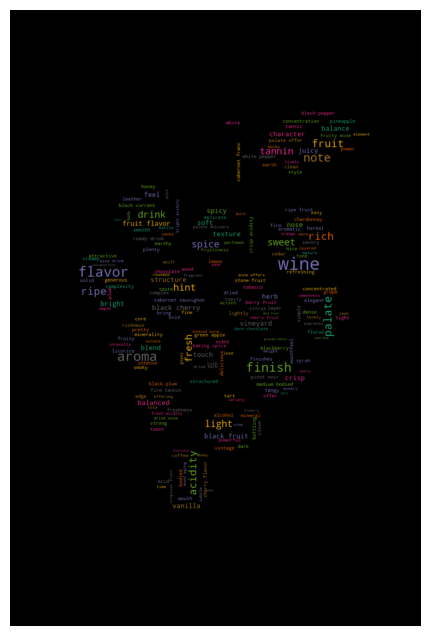

In [41]:
from wordcloud      import WordCloud, ImageColorGenerator
import PIL.Image
from IPython.display import display
from collections import Counter
# Aplanar la lista
all_wordsp3 = [word for sentencesp3 in sentencesp3 for word in sentencesp3]

uvas = PIL.Image.open("uvas.png")


uvas_mask = np.array(uvas.convert("L"))
mask_uvas = np.where(uvas_mask > 0, 255, 0).astype(np.uint8)

wordcloud = WordCloud(width=1536, height=1024,
                      max_font_size=100,
                      max_words=200,
                      background_color='black',
                      colormap='Dark2_r', 
                      stopwords=None,
                      mask=mask_uvas,
                      contour_width=0,
                      contour_color='green').generate(" ".join(all_wordsp3))

wordcloud.to_file("uvas_salidas.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

6. Aplique 3 modelos de machine learning (incluyendo Naive-Bayes) y 2 vectorizadores: *CountVectorizer* y *TfidfVectorizer* para resolver el problema de clasificación

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
top5 = ['US', 'France', 'Italy', 'Spain', 'Portugal']

df_top5 = vinos[vinos['country'].isin(top5)]

muestra_2 = df_top5.sample(n=10000, random_state=777)[['description', 'country']]
print("Datos filtrados")
print(muestra_2.head())
print(muestra_2.info())

Datos filtrados
                                              description   country
29165   Palisade remains principally Merlot, with a li...        US
91597   As proof that any blend goes in Tejo, this win...  Portugal
88616   This wine is near-equal parts Marsanne and Pic...        US
114254  Smoky and structured, this is a dry wine with ...    France
7512    This elegant sparkler opens with alluring arom...     Italy
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 29165 to 3491
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  10000 non-null  object
 1   country      10000 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB
None


In [59]:
def pre_procesado(texto):
    # minúscula
    texto = texto.lower()
    # eliminar caracteres especiales
    texto = re.sub("(@[a-z]+|#[a-z]+)+", " ", texto)
    texto = re.sub("[^a-z]+", " ", texto)
    # eliminar las stop_words
    texto = [palabra for palabra in texto.split() if (len(palabra)>3 and palabra not in stop_words) | (palabra == "not")]
    # cadena texto
    texto = " ".join(texto)
    return texto
text_clean = [pre_procesado(tweet) for tweet in muestra_2.description]

### Aplicando TfidfVectorizer

In [63]:
# aplicar el tfidf vectorizar. Recordar: sparse matrix
tfidf_vect = TfidfVectorizer( max_features=1000,     # usa solo las 1000 palabras más frecuentes
                              min_df=2,              # opcional: ignora palabras que aparezcan en <2 documentos
                              #max_df=0.8,           # opcional: ignora palabras que aparecen en >80% de documentos (demasiado comunes)
                              )
tfidf = tfidf_vect.fit_transform(muestra_2.description)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names_out())
tfidf_matrix

,10,100,12,14,15,20,2012,2014,2015,2016,...,yellow,yet,you,young,your,youthful,zest,zesty,zin,zinfandel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.271877,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.169721,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Entrenamiento de modelos

In [64]:
# Dividir en dos conjuntos
# las variables predictoras

X = tfidf_matrix
# la variable objetivo
y = muestra_2.country
# conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    stratify=y,               # estratificamos con respecto a y (asegura que se mantenga la proporción de clases en y)
                                                    random_state = 777,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.3)          # tamaño del conjunto de prueba
print("Separación de datos realizada")

Separación de datos realizada


In [75]:
modelos = {
    # Modelo Bagging
    # Modelo Random Forest
    "modelo_rf" : RandomForestClassifier(
                            n_estimators=300,         # nº de árboles
                            max_depth=10,           # sin límite; prueba valores si ves sobreajuste
                            min_samples_split=2,      # número mínimo de muestras para dividir (default=2)
                            min_samples_leaf=5,       # número de muestras mínimo que debe tener una hoja (default=1)
                            max_features="sqrt",      # raíz del número de características
                            bootstrap=True,           # muestreo con reemplazo
                            random_state=777 ),         # semilla
    # Modelo Extra Trees (Extremely Randomized Trees)
    "modelo_et" : ExtraTreesClassifier(
                          n_estimators=300,
                          max_depth=10,
                          min_samples_split=2,
                          min_samples_leaf=5,
                          max_features="sqrt",
                          bootstrap=False,           # ExtraTrees suele ir sin bootstrap
                          random_state=777),
    # Modelo Boosting
    # Modelo XGBoost
    "naive_bayes" : MultinomialNB()
}

Funciones propias para entrenamiento y creación de gráficos creadas desde el taller anterior.

In [67]:
def matriz_confusion(modelo, X_train, y_train, X_test, y_test, nombre_modelo = "modelo"):
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.metrics import confusion_matrix
  '''
  La función que permite construir la matriz de confusión sobre el modelo aplicado está compuesta por los siguientes parametros:
  modelo: Modelo utilizado
  X_train, y_train: Datos de entrenamiento
  X_test, y_test: Datos de prueba
  nombre_modelo: Nombre del modelo

  '''
  y_pred_train = modelo.predict(X_train)
  y_pred_test  = modelo.predict(X_test)

  cm_train = confusion_matrix(y_train, y_pred_train)
  cm_test = confusion_matrix(y_test, y_pred_test)

  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  sns.heatmap(pd.DataFrame(cm_train),                 # data.frame
                  annot=True,                          # colocar números de las cajitas
                  annot_kws = {'size':20},             # tamaño de la letra
                  cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                  fmt='g',                             # para que salgan los número no : notación científica
                  ax=axes[0])

  axes[0].set_title(f'Matriz de Confusión - Train-{nombre_modelo}', fontsize=14)
  axes[0].set_xlabel('Predicciones')
  axes[0].set_ylabel('Valores Reales')
  # matriz de confusión en test
  sns.heatmap(pd.DataFrame(cm_test),
              annot=True,
              fmt='g',
              cmap='YlOrRd',
              annot_kws={'size':16},
              ax=axes[1])
  axes[1].set_title(f'Matriz de Confusión - Test-{nombre_modelo}', fontsize=14)
  axes[1].set_xlabel('Predicciones')
  axes[1].set_ylabel('Valores Reales')
  plt.tight_layout()
  plt.show()

In [68]:
def metricas_modelo(modelo, X_train, y_train, X_test, y_test, nombre_modelo = "modelo"):
  '''
  La función caclculas las métricas de evaluación del modelo aplicado está compuesta por los siguientes parametros:
  modelo: Modelo utilizado
  X_train, y_train: Datos de entrenamiento
  X_test, y_test: Datos de prueba
  nombre_modelo: Nombre del modelo
  '''
  import pandas as pd
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  from imblearn.metrics import specificity_score

  y_pred_train = modelo.predict(X_train)
  y_pred_test  = modelo.predict(X_test)

  # metricas en train
  metrics=["accuracy", "recall" , "specificity", "precision", "f1"]
  # valores
  values_train = [accuracy_score(y_train,y_pred_train),
          recall_score(y_train,y_pred_train),
          specificity_score(y_train,y_pred_train),
          precision_score(y_train,y_pred_train),
          f1_score(y_train,y_pred_train)]
  values_test = [accuracy_score(y_test,y_pred_test),
          recall_score(y_test,y_pred_test),
          specificity_score(y_test,y_pred_test),
          precision_score(y_test,y_pred_test),
          f1_score(y_test,y_pred_test)]

  df = pd.DataFrame({f"{nombre_modelo}_train" : values_train,
                      f"{nombre_modelo}_test" : values_test}, index = metrics)
  return df

In [69]:
def entrenar_y_evaluar(modelos, X_train, y_train, X_test, y_test, exportar=True):
    resultados = {}
    modelos_entrenados = {}

    for nombre, clf in modelos.items():

        # Medir tiempo de entrenamiento
        inicio = time.time()
        modelo = clf.fit(X_train, y_train)
        fin = time.time()

        # Guardar modelo entrenado
        modelos_entrenados[nombre] = modelo

        # Exportar el modelo a archivo .pkl
        if exportar:
            nombre_archivo = f"modelo_{nombre}.pkl"
            joblib.dump(modelo, nombre_archivo)
            print(f"Modelo {nombre} guardado en '{nombre_archivo}'")

        # Predecir
        y_pred = modelo.predict(X_test)

        # Calcular métricas
        acc = accuracy_score(y_test, y_pred)
        reporte = classification_report(y_test, y_pred, output_dict=True)

        resultados[nombre] = {
            "accuracy": acc,
            "tiempo": fin - inicio,
            "reporte": reporte
        }

        # Mostrar resultados en consola
        print(f"\n===== {nombre} =====")
        print(f"Accuracy: {acc:.4f}")
        print(f"Tiempo de entrenamiento: {fin - inicio:.2f} segundos")
        print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
        
        # Matriz de confusión (si existe tu función)
        matriz_confusion(modelo, X_train, y_train, X_test, y_test, nombre_modelo=nombre)

    return resultados, modelos_entrenados

In [78]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def graficar_curvas_roc_multiclase(modelos_entrenados, X_train, y_train, X_test, y_test):
    """
    Grafica curvas ROC multiclase (OvR) para cada modelo en train y test.
    Devuelve AUC macro y micro.
    """

    # Obtener clases únicas
    clases = np.unique(y_train)

    # Convertir etiquetas a formato binarizado para multiclase
    y_train_bin = label_binarize(y_train, classes=clases)
    y_test_bin = label_binarize(y_test, classes=clases)
    n_clases = len(clases)

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    resultados_auc = {"train": {}, "test": {}}

    # ========= ENTRENAMIENTO ==========
    for nombre, modelo in modelos_entrenados.items():

        # Obtener probabilidades
        if hasattr(modelo, "predict_proba"):
            y_proba_train = modelo.predict_proba(X_train)
        else:
            y_proba_train = modelo.decision_function(X_train)

        # AUC por clase
        aucs = []
        for i in range(n_clases):
            fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_proba_train[:, i])
            auc_i = auc(fpr, tpr)
            aucs.append(auc_i)
            axes[0].plot(fpr, tpr, label=f"{nombre} - Clase {clases[i]} (AUC={auc_i:.3f})")

        # AUC macro (promedio)
        auc_macro = np.mean(aucs)
        # AUC micro
        fpr_micro, tpr_micro, _ = roc_curve(y_train_bin.ravel(), y_proba_train.ravel())
        auc_micro = auc(fpr_micro, tpr_micro)

        resultados_auc["train"][nombre] = {
            "auc_macro": auc_macro,
            "auc_micro": auc_micro
        }

    axes[0].plot([0,1], [0,1], "k--")
    axes[0].set_title("Curvas ROC (Entrenamiento)")
    axes[0].set_xlabel("FPR")
    axes[0].set_ylabel("TPR")
    axes[0].legend(loc="best")

    # ========= PRUEBA ==========
    for nombre, modelo in modelos_entrenados.items():

        if hasattr(modelo, "predict_proba"):
            y_proba_test = modelo.predict_proba(X_test)
        else:
            y_proba_test = modelo.decision_function(X_test)

        aucs = []
        for i in range(n_clases):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_test[:, i])
            auc_i = auc(fpr, tpr)
            aucs.append(auc_i)
            axes[1].plot(fpr, tpr, label=f"{nombre} - Clase {clases[i]} (AUC={auc_i:.3f})")

        auc_macro = np.mean(aucs)
        fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_proba_test.ravel())
        auc_micro = auc(fpr_micro, tpr_micro)

        resultados_auc["test"][nombre] = {
            "auc_macro": auc_macro,
            "auc_micro": auc_micro
        }

    axes[1].plot([0,1], [0,1], "k--")
    axes[1].set_title("Curvas ROC (Prueba)")
    axes[1].set_xlabel("FPR")
    axes[1].set_ylabel("TPR")
    axes[1].legend(loc="best")

    plt.tight_layout()
    plt.show()

    return resultados_auc


Ejecución de los modelos por medio de funciones personalizadas

Modelo modelo_rf guardado en 'modelo_modelo_rf.pkl'

===== modelo_rf =====
Accuracy: 0.6987
Tiempo de entrenamiento: 2.62 segundos
Reporte de clasificación:
               precision    recall  f1-score   support

      France       0.73      0.51      0.60       618
       Italy       0.99      0.53      0.69       547
    Portugal       0.00      0.00      0.00       165
       Spain       1.00      0.02      0.04       179
          US       0.65      1.00      0.79      1491

    accuracy                           0.70      3000
   macro avg       0.68      0.41      0.42      3000
weighted avg       0.72      0.70      0.64      3000



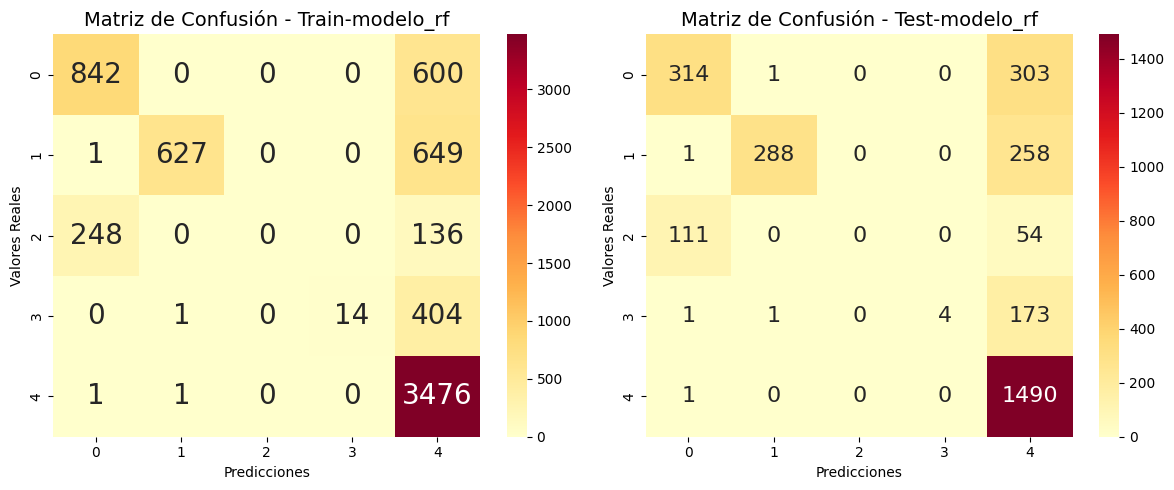

Modelo modelo_et guardado en 'modelo_modelo_et.pkl'

===== modelo_et =====
Accuracy: 0.6320
Tiempo de entrenamiento: 3.23 segundos
Reporte de clasificación:
               precision    recall  f1-score   support

      France       0.76      0.30      0.43       618
       Italy       1.00      0.41      0.58       547
    Portugal       0.00      0.00      0.00       165
       Spain       0.00      0.00      0.00       179
          US       0.59      1.00      0.74      1491

    accuracy                           0.63      3000
   macro avg       0.47      0.34      0.35      3000
weighted avg       0.63      0.63      0.56      3000



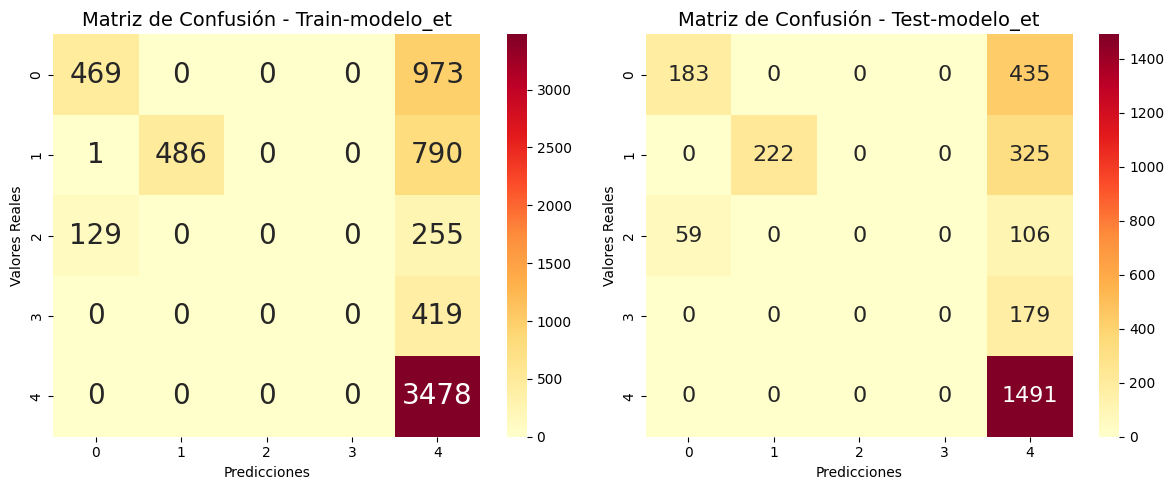

Modelo naive_bayes guardado en 'modelo_naive_bayes.pkl'

===== naive_bayes =====
Accuracy: 0.8350
Tiempo de entrenamiento: 0.02 segundos
Reporte de clasificación:
               precision    recall  f1-score   support

      France       0.78      0.81      0.79       618
       Italy       0.99      0.80      0.88       547
    Portugal       1.00      0.10      0.18       165
       Spain       1.00      0.37      0.54       179
          US       0.81      1.00      0.89      1491

    accuracy                           0.83      3000
   macro avg       0.92      0.62      0.66      3000
weighted avg       0.86      0.83      0.81      3000



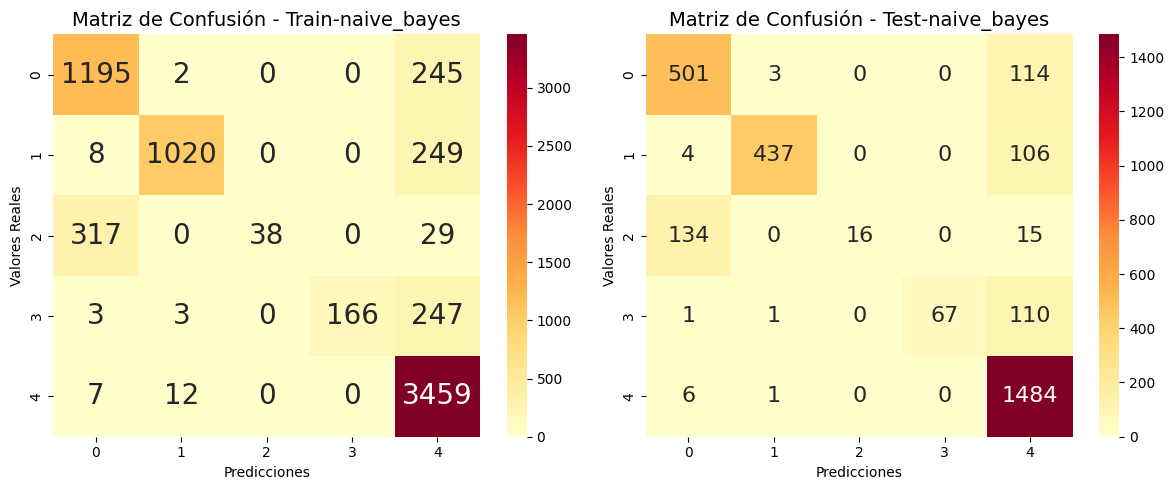

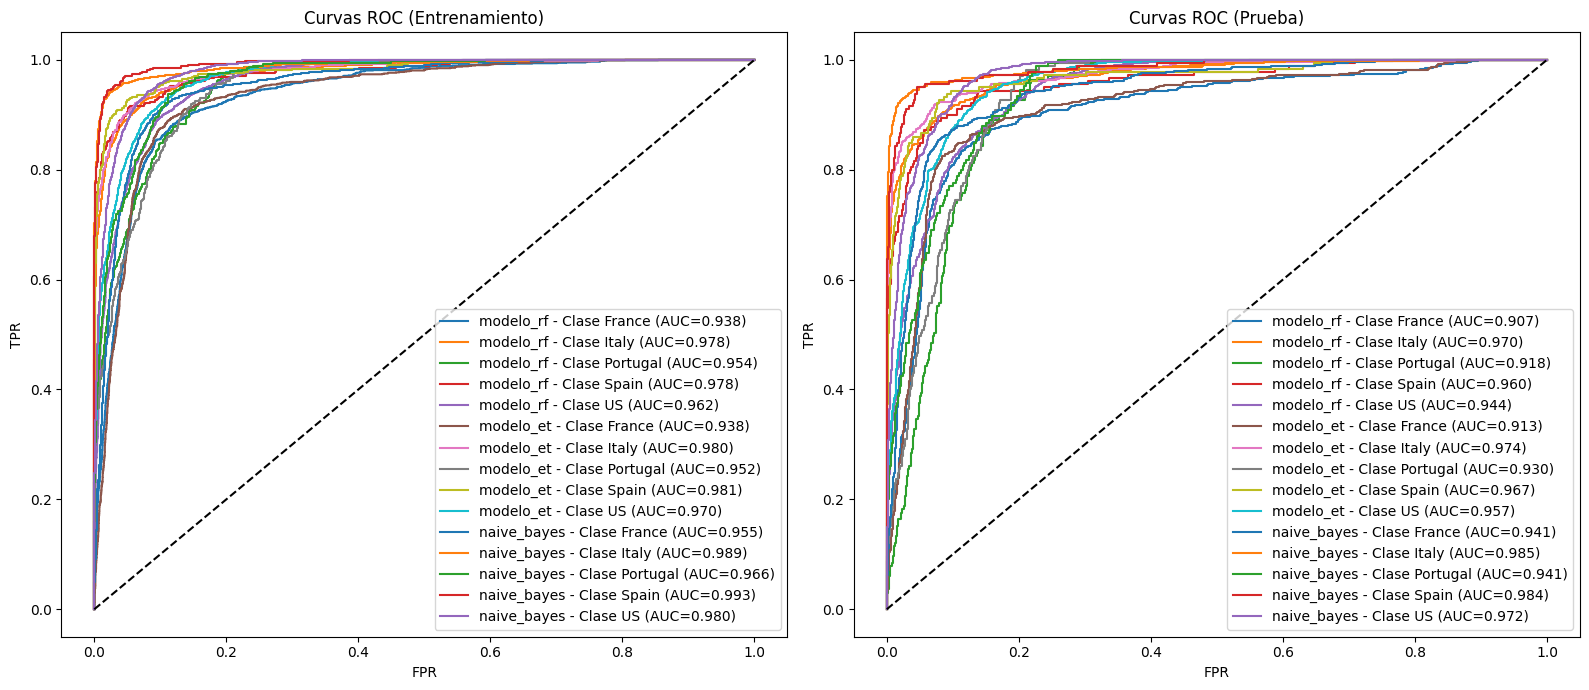


AUC por modelo:

--- Resultados en TRAIN ---
modelo_rf: AUC Macro = 0.9619, AUC Micro = 0.9403
modelo_et: AUC Macro = 0.9642, AUC Micro = 0.9116
naive_bayes: AUC Macro = 0.9767, AUC Micro = 0.9766

--- Resultados en TEST ---
modelo_rf: AUC Macro = 0.9397, AUC Micro = 0.9263
modelo_et: AUC Macro = 0.9484, AUC Micro = 0.9030
naive_bayes: AUC Macro = 0.9647, AUC Micro = 0.9702


In [81]:
# Entrenar una vez y guardar resultados + modelos entrenados
resultados, modelos_entrenados = entrenar_y_evaluar(modelos, X_train, y_train, X_test, y_test)

# Ahora graficar ROC y obtener AUCs sin reentrenar
auc_resultados = graficar_curvas_roc_multiclase(modelos_entrenados,X_train, y_train, X_test, y_test)

print("\nAUC por modelo:")

for conjunto, resultados in auc_resultados.items():
    print(f"\n--- Resultados en {conjunto.upper()} ---")

    for modelo, score_dict in resultados.items():
        auc_macro = score_dict["auc_macro"]
        auc_micro = score_dict["auc_micro"]

        print(f"{modelo}: AUC Macro = {auc_macro:.4f}, AUC Micro = {auc_micro:.4f}")

### Aplicando TfidfVectorizer